# Stack Overflow Developer Survey
Analyze the Stack Overflow Developer Survey data from 2024.

Structure:
- Analyze the survey and the results
- create and train a ML Model
- Evaluate the model
- make predictions

## Info in survey

the survey contains 7 sections:

1. Basic Information   
2. Education, Work, and Career   
3. Technology and Tech Culture   
4. Stack Overflow Usage + Community   
5. Artificial Intelligence    
6. Professional Developer Series (Optional)   
7. Final Questions


In [14]:
# make some imports
import pandas as pd
import matplotlib.pyplot as plt

# read the schema
df_schema = pd.read_csv('data/survey_results_schema.csv', index_col='qid')

In [ ]:
# First 10 questions
df_schema.head(10)

,qname,question,force_resp,type,selector
qid,,,,,
QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
QID127,Age,What is your age?*,True,MC,SAVR
QID296,Employment,Which of the following best describes your cur...,True,MC,MAVR
QID308,RemoteWork,Which best describes your current work situation?,False,MC,SAVR
QID341,Check,Just checking to make sure you are paying atte...,True,MC,SAVR
QID297,CodingActivities,Which of the following best describes the code...,False,MC,MAVR
QID25,EdLevel,Which of the following best describes the high...,True,MC,SAVR
QID276,LearnCode,How do you learn to code? Select all that apply.,False,MC,MAVR
QID281,LearnCodeOnline,What online resources do you use to learn to c...,False,MC,MAVR


In [ ]:
# last 10 questions
df_schema.tail(10)

,qname,question,force_resp,type,selector
qid,,,,,
QID290,Frequency_3,Encountering knowledge silos (where one indivi...,NaN,MC,MAVR
QID337,JobSatPoints_1,Driving strategy for my team,NaN,MC,MAVR
QID337,JobSatPoints_4,Contributing to open source,NaN,MC,MAVR
QID337,JobSatPoints_5,Securing data and environments,NaN,MC,MAVR
QID337,JobSatPoints_6,Improving quality of code and developer enviro...,NaN,MC,MAVR
QID337,JobSatPoints_7,"Learning and using new technology, including p...",NaN,MC,MAVR
QID337,JobSatPoints_8,"Designing and building environments, databases...",NaN,MC,MAVR
QID337,JobSatPoints_9,"Being a power user of a tool, developer langua...",NaN,MC,MAVR
QID337,JobSatPoints_10,Working with new and/or top-quality hardware,NaN,MC,MAVR


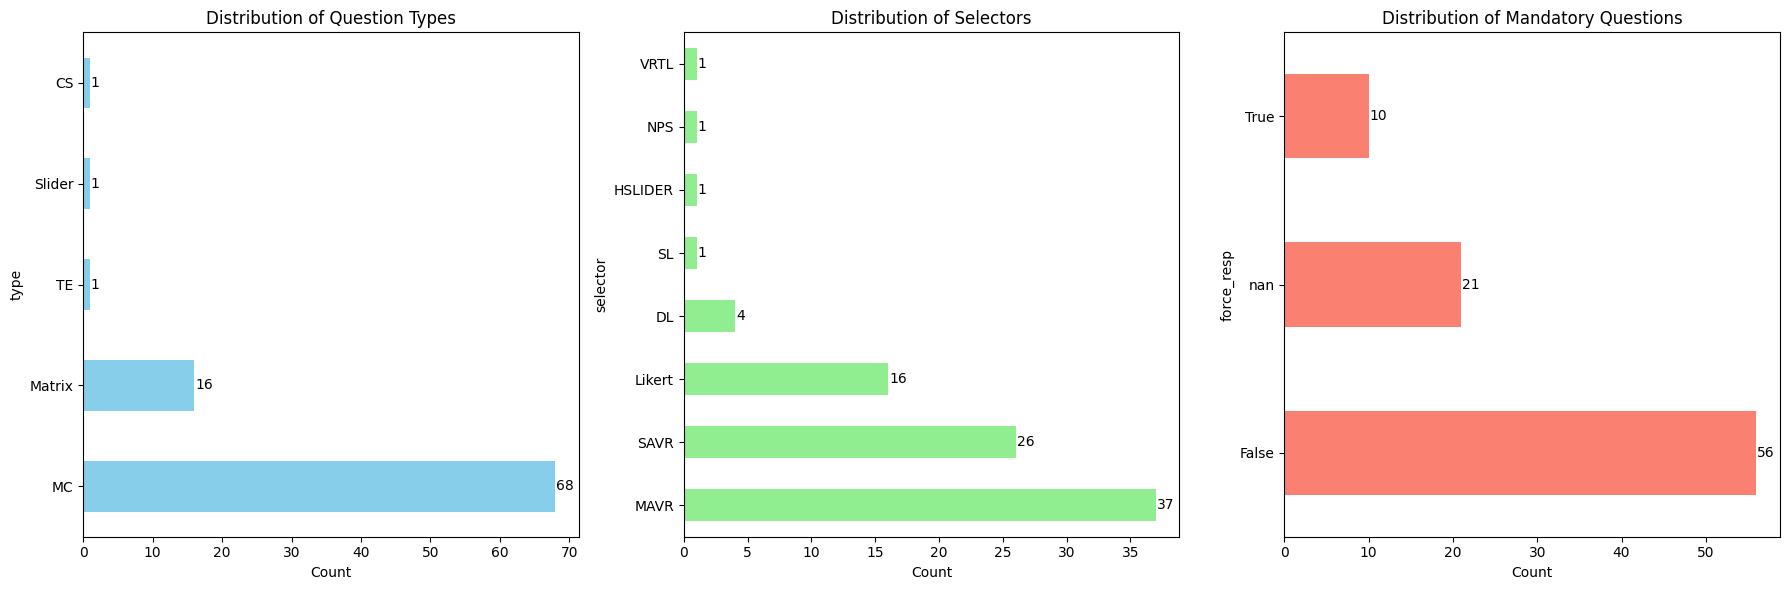

In [ ]:
# Count occurrences of different question types and selectors
type_counts = df_schema['type'].value_counts()
selector_counts = df_schema['selector'].value_counts()
force_resp_counts = df_schema['force_resp'].value_counts(dropna=False)

# Create a figure with multiple subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot the distributions as horizontal bar charts with values
type_counts.plot.barh(ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Question Types')
axes[0].set_xlabel('Count')
# Add values to the bars
for i, v in enumerate(type_counts):
    axes[0].text(v + 0.1, i, str(v), va='center')

selector_counts.plot.barh(ax=axes[1], color='lightgreen')
axes[1].set_title('Distribution of Selectors')
axes[1].set_xlabel('Count')
# Add values to the bars
for i, v in enumerate(selector_counts):
    axes[1].text(v + 0.1, i, str(v), va='center')

force_resp_counts.plot.barh(ax=axes[2], color='salmon')
axes[2].set_title('Distribution of Mandatory Questions')
axes[2].set_xlabel('Count')
# Add values to the bars
for i, v in enumerate(force_resp_counts):
    axes[2].text(v + 0.1, i, str(v), va='center')

plt.tight_layout()
plt.show()

In [21]:
df_schema[df_schema['selector'] == 'Likert']


,qname,question,force_resp,type,selector
qid,,,,,
QID233,Language,"Which <b>programming, scripting, and markup la...",False,Matrix,Likert
QID262,Database,Which <b>database environments </b>have you do...,False,Matrix,Likert
QID263,Platform,Which <b>cloud platforms</b> have you done ext...,False,Matrix,Likert
QID264,Webframe,Which <b>web frameworks and web technologies</...,False,Matrix,Likert
QID340,Embedded,Which <b>embedded systems and technologies</b>...,False,Matrix,Likert
QID265,MiscTech,Which <b>other frameworks and libraries</b> ha...,False,Matrix,Likert
QID275,ToolsTech,Which <b>developer </b><strong>tools for compi...,False,Matrix,Likert
QID274,NEWCollabTools,Which <strong>development environments</strong...,False,Matrix,Likert
QID71,OpSys,What is the primary <b>operating system</b> in...,False,Matrix,Likert
